# Visualisasi Dataset menggunakan algoritma Convex Hull berbasis Divide and Conquer

Semua cell dibuat agar dapat dijalankan secara independen
apabila ingin menjalankan melalui Google Colab disediakan cell berisi fungsi di paling bawah file ini

-Farrel

## Visualisasi Dataset Iris
### Sepal Length vs Sepal Width

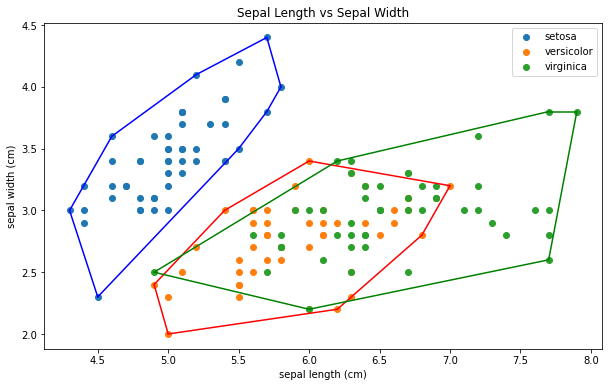

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
import matplotlib.pyplot as plt
from myConvexHull import myConvexHull

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Length vs Sepal Width')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)): #len(data.target_names)
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)                                              # versi aku ehe syahul-san wa
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

### Petal Length vs Petal Width

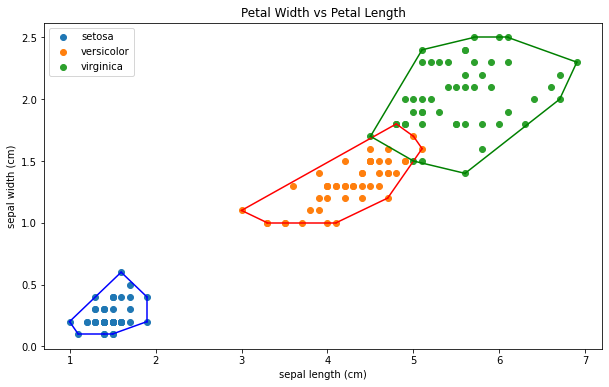

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
import matplotlib.pyplot as plt
from myConvexHull import myConvexHull

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)): #len(data.target_names)
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)                                              # versi aku ehe syahul-san wa
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

## Dataset Wine
### Alcohol vs Ash Alcalinity

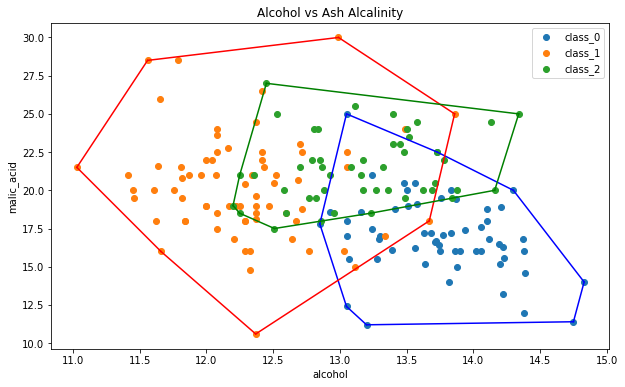

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_wine()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
import matplotlib.pyplot as plt
from myConvexHull import myConvexHull


import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Ash Alcalinity')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)): #
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,3]].values
    hull = myConvexHull(bucket)                                              # versi aku ehe syahul-san wa
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

## Dataset Breast Cancer
### Mean Radius vs Mean Texture

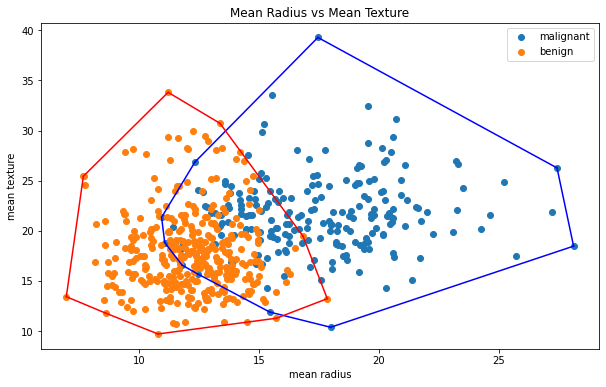

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
import matplotlib.pyplot as plt
from myConvexHull import myConvexHull

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Radius vs Mean Texture')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)): #
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)                                              # versi aku ehe syahul-san wa
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

## Function myConvexHull
### For Google Colab Purposes

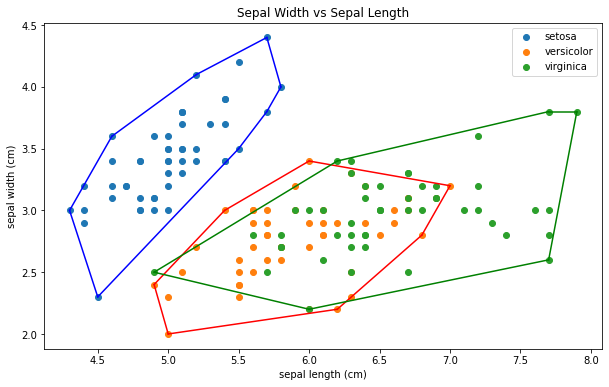

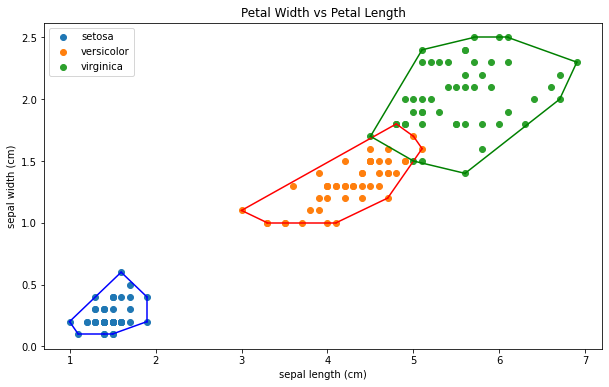

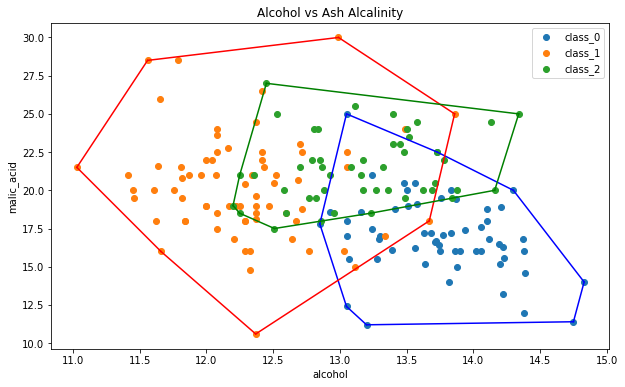

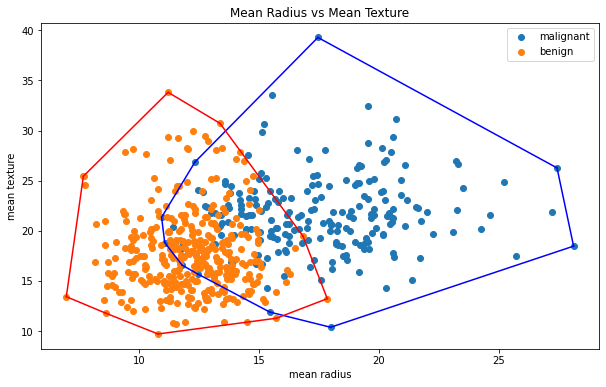

In [6]:
def detFunc(p1, p2, p3):
    """
    does the determinant formula thing from Rin-sensei to check if a given point p3 is above the line made between point p1 and p2 
    """

    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    x3 = p3[0]
    y3 = p3[1]
    determinant = x1 * y2 + x3 * y1 + x2 * y3 - x3 * y2 - x2 * y1 - x1 * y3
    return determinant

def heron(len1, len2, len3):
    """
    does the heron formula for calculating a given triangle area
    """
    s = (len1 + len2 + len3)/2
    return (s * (s-len1) * (s-len2) * (s-len3))**0.5

def findDistance(p1, p2, p3):
    """
    returns the distance of point p3 relative to the line made between point p1 and point p2
    """
    from math import dist 
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    # print(p1, p2, p3)
    pembilang = heron(dist(p1, p2), dist(p2, p3), dist(p3, p1))
    penyebut = ((x2-x1)**2 + (y2-y1)**2)**0.5
    return pembilang/penyebut


def findPointsBelowLine(p1, p2, idxArr, baseArr):
    """
    finds the points BELOW the line connecting p1 and p2 in points whose index exists in idxArr, 
    
    returns the index of those points based on baseArr
    """
    temp = []
    for idx in idxArr:
        if (detFunc(p1, p2, baseArr[idx]) < 0):
            temp.append(idx)
    return temp

def findExtremesBelow(idxPoint1, idxPoint2, idxArr, baseArr):
    """
    finds the points that makes the bottom of a convex hull

    returns the index of those points in the array baseArr
    """
    maxDistLocal = 0
    tempIdx = -1  # basic error code if not found
    for i in idxArr:
        if (maxDistLocal < findDistance(baseArr[idxPoint1], baseArr[idxPoint2], baseArr[i])):
            maxDistLocal = findDistance(baseArr[idxPoint1], baseArr[idxPoint2], baseArr[i])
            tempIdx = i
    if (tempIdx == -1):
        return [idxPoint1, idxPoint2]
    else:
        return findExtremesBelow(idxPoint1, tempIdx, findPointsBelowLine(baseArr[idxPoint1], baseArr[tempIdx], idxArr, baseArr), baseArr) + findExtremesBelow(tempIdx, idxPoint2, findPointsBelowLine(baseArr[tempIdx], baseArr[idxPoint2], idxArr, baseArr), baseArr)

def findPointsAboveLine(p1, p2, idxArr, baseArr):
    """
    finds the points ABOVE the line connecting p1 and p2 in points whose index exists in idxArr, 
    
    returns the index of those points based on baseArr
    """
    temp = []
    for idx in idxArr:
        if (detFunc(p1, p2, baseArr[idx]) > 0):
            temp.append(idx)
    return temp

def findExtremesAbove(idxPoint1, idxPoint2, idxArr, baseArr):
    """
    finds the points that makes the top of a convex hull

    returns the index of those points in the array baseArr
    """
    maxDistLocal = 0
    tempIdx = -1  # basic error code if not found
    for i in idxArr:
        if (maxDistLocal < findDistance(baseArr[idxPoint1], baseArr[idxPoint2], baseArr[i])):
            maxDistLocal = findDistance(baseArr[idxPoint1], baseArr[idxPoint2], baseArr[i])
            tempIdx = i
    if (tempIdx == -1):
        return [idxPoint1, idxPoint2]
    else:
        return findExtremesAbove(idxPoint1, tempIdx, findPointsAboveLine(baseArr[idxPoint1], baseArr[tempIdx], idxArr, baseArr), baseArr) + findExtremesAbove(tempIdx, idxPoint2, findPointsAboveLine(baseArr[tempIdx], baseArr[idxPoint2], idxArr, baseArr), baseArr)


def connectTwo(idx1, idx2, arr):
    """
    connects two indexes and adds it into arr

    Ex: (1, 2, []), the array becomes [[1,2]]
    """
    arr.append([idx1, idx2])

def connectAllPoints(idxArr):
    """
    connects all points given in the array idxArr and returns it

    Ex: [1, 2, 3] becomes [[1,2] [2,3]]
    """
    temp = []
    for i in range(len(idxArr) - 1):
        if (idxArr[i] != idxArr[i + 1]):   # making sure theres no such thing as a point connecting to itself
            connectTwo(idxArr[i], idxArr[i+1], temp)
    return temp

def myConvexHull(inp):
    """
    QuickHull :D

    returns an array of index of points in the input array that makes a convex hull
    """
    bucket = inp

    # first, find the maximum and minimum Points in the X axis (ignores height, or Y)
    nEffective = len(bucket)
    x_idxMax = 0
    x_idxMin = 0
    for i in range(nEffective):
        if (bucket[i][0] > bucket[x_idxMax][0]):
            x_idxMax = i
        if (bucket[i][0] < bucket[x_idxMin][0]):
            x_idxMin = i

    # makes the base index array wooooooaaaaaaa
    baseIndexArr = []
    for i in range(len(bucket)):
        baseIndexArr.append(i)

    # finally, create the connection index array    
    connIdx = connectAllPoints(findExtremesAbove(x_idxMin, x_idxMax, findPointsAboveLine(bucket[x_idxMin], bucket[x_idxMax], baseIndexArr, bucket), bucket))
    connIdx += connectAllPoints(findExtremesBelow(x_idxMin, x_idxMax, findPointsBelowLine(bucket[x_idxMin], bucket[x_idxMax], baseIndexArr, bucket), bucket))

    # returns the array
    return connIdx

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
import matplotlib.pyplot as plt


plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)): #len(data.target_names)
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)                                              # versi aku ehe syahul-san wa
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()


import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
import matplotlib.pyplot as plt


plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)): #len(data.target_names)
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)                                              # versi aku ehe syahul-san wa
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_wine()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
import matplotlib.pyplot as plt



import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Ash Alcalinity')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)): #
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,3]].values
    hull = myConvexHull(bucket)                                              # versi aku ehe syahul-san wa
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_breast_cancer()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Mean Radius vs Mean Texture')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)): #
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)                                              # versi aku ehe syahul-san wa
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()